In [99]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from legwork import evol, utils
import legwork as lw
import astropy.units as u

In [2]:
# pick some values
ecc_i = 0.001
m_1 = 50 * u.Msun
m_2 = 49 * u.Msun
f_orb_i = 1 * u.Hz

In [3]:
# evolve with only 10 timesteps
f_orb_evol, ecc_evol = evol.evol_ecc(t_evol=-5*u.yr, n_step=2, m_1=m_1, m_2=m_2, f_orb_i=f_orb_i, ecc_i=ecc_i,
                                     t_before=0.1*u.yr, output_vars=["f_orb", "ecc"])
    


In [4]:
f_orb_evol, ecc_evol

(<Quantity [1.        , 0.00567779] Hz>, array([0.001     , 0.21536356]))

## cool! You can run LW backwards instead of forwards!

In [109]:
n_pop = 100
ecc_i = 10**np.random.normal(loc=-6, scale=0.25, size=n_pop)
m_1 = np.random.normal(loc=30, scale=5, size=n_pop) * u.Msun
m_2 = np.random.normal(loc=30, scale=5, size=n_pop) * u.Msun
forb_i = np.ones(n_pop) * 10 * u.Hz
t_evol = np.ones(n_pop) * -1000 * u.yr


## need to calculate t_evol for each forb_LISA

In [110]:
f_orb_evol, ecc_evol = evol.evol_ecc(t_evol=t_evol, n_step=10000, m_1=m_1, m_2=m_2, f_orb_i=forb_i, ecc_i=ecc_i,
                                     t_before=0.1*u.yr, output_vars=["f_orb", "ecc"])
    
m_c = utils.chirp_mass(m_1, m_2)

In [111]:
ecc_evol[:, -1]

array([0.01184072, 0.03575504, 0.01463375, 0.00645997, 0.02077603,
       0.00690846, 0.01898377, 0.03497751, 0.01404902, 0.01641079,
       0.01122179, 0.02882788, 0.01155046, 0.00650677, 0.01263385,
       0.02452937, 0.01521356, 0.00822683, 0.00781486, 0.01865968,
       0.04087758, 0.01147791, 0.01981232, 0.0103267 , 0.03067389,
       0.01256893, 0.02127658, 0.01012223, 0.01950606, 0.00930978,
       0.03075913, 0.01032426, 0.03479198, 0.01427793, 0.01403361,
       0.0149176 , 0.0240388 , 0.01929981, 0.0062916 , 0.01032133,
       0.01840462, 0.0059842 , 0.01202197, 0.01707578, 0.00702748,
       0.01774881, 0.01426023, 0.0143225 , 0.00536012, 0.02122229,
       0.00470593, 0.06039978, 0.01816783, 0.03139493, 0.0221907 ,
       0.00730281, 0.01299035, 0.00646029, 0.01121734, 0.01716497,
       0.02531152, 0.00712564, 0.02108887, 0.0184977 , 0.01393496,
       0.00280468, 0.00713281, 0.02846097, 0.02242599, 0.01012114,
       0.01959424, 0.0253279 , 0.03023166, 0.0208546 , 0.00275

(0.0001, 10.0)

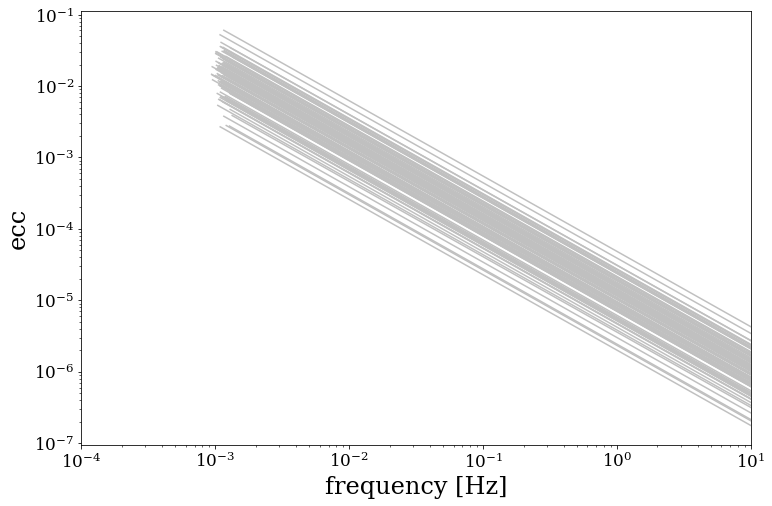

In [112]:
for f, e, mc in zip(f_orb_evol, ecc_evol, m_c):
    plt.plot(f, e, c='silver')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('frequency [Hz]')
plt.ylabel('ecc')
plt.xlim(1e-4, 1e1)

In [103]:
source = lw.source.Source(m_1=m_1,
                          m_2=m_2,
                          ecc=ecc_evol[:, -1],
                          f_orb=f_orb_evol[:, -1],
                          dist=8 * np.ones(100) * u.Mpc,
                          interpolate_g=False)


In [105]:
snr = source.get_snr()

Text(0.5, 0, 'horizon distance [Mpc]')

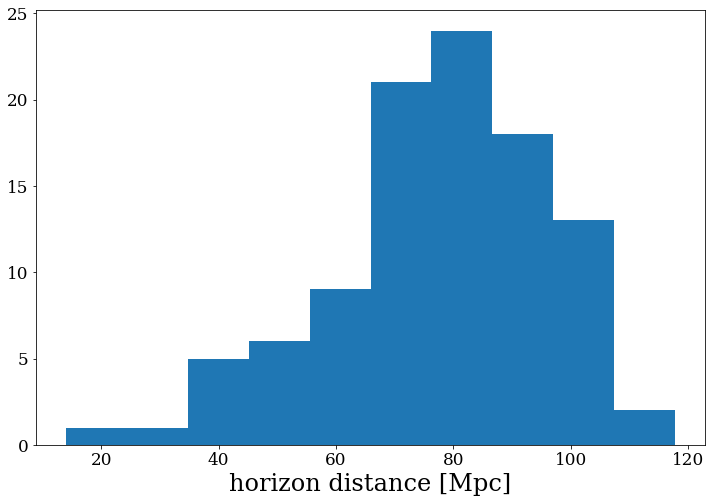

In [108]:
D_h = snr/7 * 8 * np.ones(100) * u.Mpc

plt.hist(D_h.value)
plt.xlabel('horizon distance [Mpc]')

In [89]:
n_pop = 100
ecc_i = 10**np.random.normal(loc=-4, scale=0.25, size=n_pop)
m_1 = np.random.normal(loc=30, scale=5, size=n_pop) * u.Msun
m_2 = np.random.normal(loc=30, scale=5, size=n_pop) * u.Msun
forb_i = np.ones(n_pop) * 10 * u.Hz
t_evol = np.ones(n_pop) * -100 * u.yr


In [90]:
f_orb_evol, ecc_evol = evol.evol_ecc(t_evol=t_evol, n_step=10000, m_1=m_1, m_2=m_2, f_orb_i=forb_i, ecc_i=ecc_i,
                                     t_before=0.1*u.yr, output_vars=["f_orb", "ecc"])
    
m_c = utils.chirp_mass(m_1, m_2)

(0.0001, 10.0)

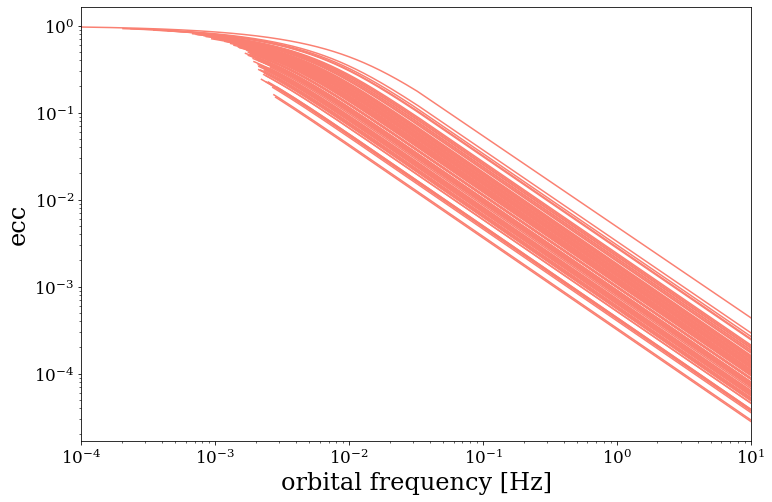

In [93]:
for f, e, mc in zip(f_orb_evol, ecc_evol, m_c):
    plt.plot(f, e, c='salmon')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('orbital frequency [Hz]')
plt.ylabel('ecc')
plt.xlim(1e-4, 1e1)